# <center> CENSUS DATA EDA

## Outline
- [ 1 - Packages](#1)
- [ 2 - Data Load](#2)
- [ 3 - EDA](#3)
- [ 4 - Data Cleaning](#4)

<a name="1"></a>
## 1 - Packages

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

<a name="2"></a>
## 2 - Data Load

In [59]:
df = pd.read_csv('data/census.csv')

<a name="3"></a>
## 3 - EDA

In [60]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
df.shape

(32561, 15)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
df.columns

Index(['age', ' workclass', ' fnlgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [64]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [65]:
cate_feat = list(df.select_dtypes(include=['object']).columns)
num_feat = list(df.select_dtypes(exclude=['object']).columns)

In [66]:
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [67]:
for col in cate_feat:
    print(df[col].value_counts())
    print('')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-manager

In [68]:
df.isna().sum()

age               0
workclass         0
fnlgt             0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [69]:
# finding out if any feature has zero variance (categorical feature)
print("Categorical features having only one unique value:")
for feature in cate_feat:
    if df[feature].nunique() == 1:
        print(feature)

Categorical features having only one unique value:


In [70]:
# we will consider the numerical features having less than 20 unique values as categorical features
for feature in num_feat:
    if df[feature].nunique() <= 20:
        cate_feat.append(feature)
        num_feat.remove(feature)

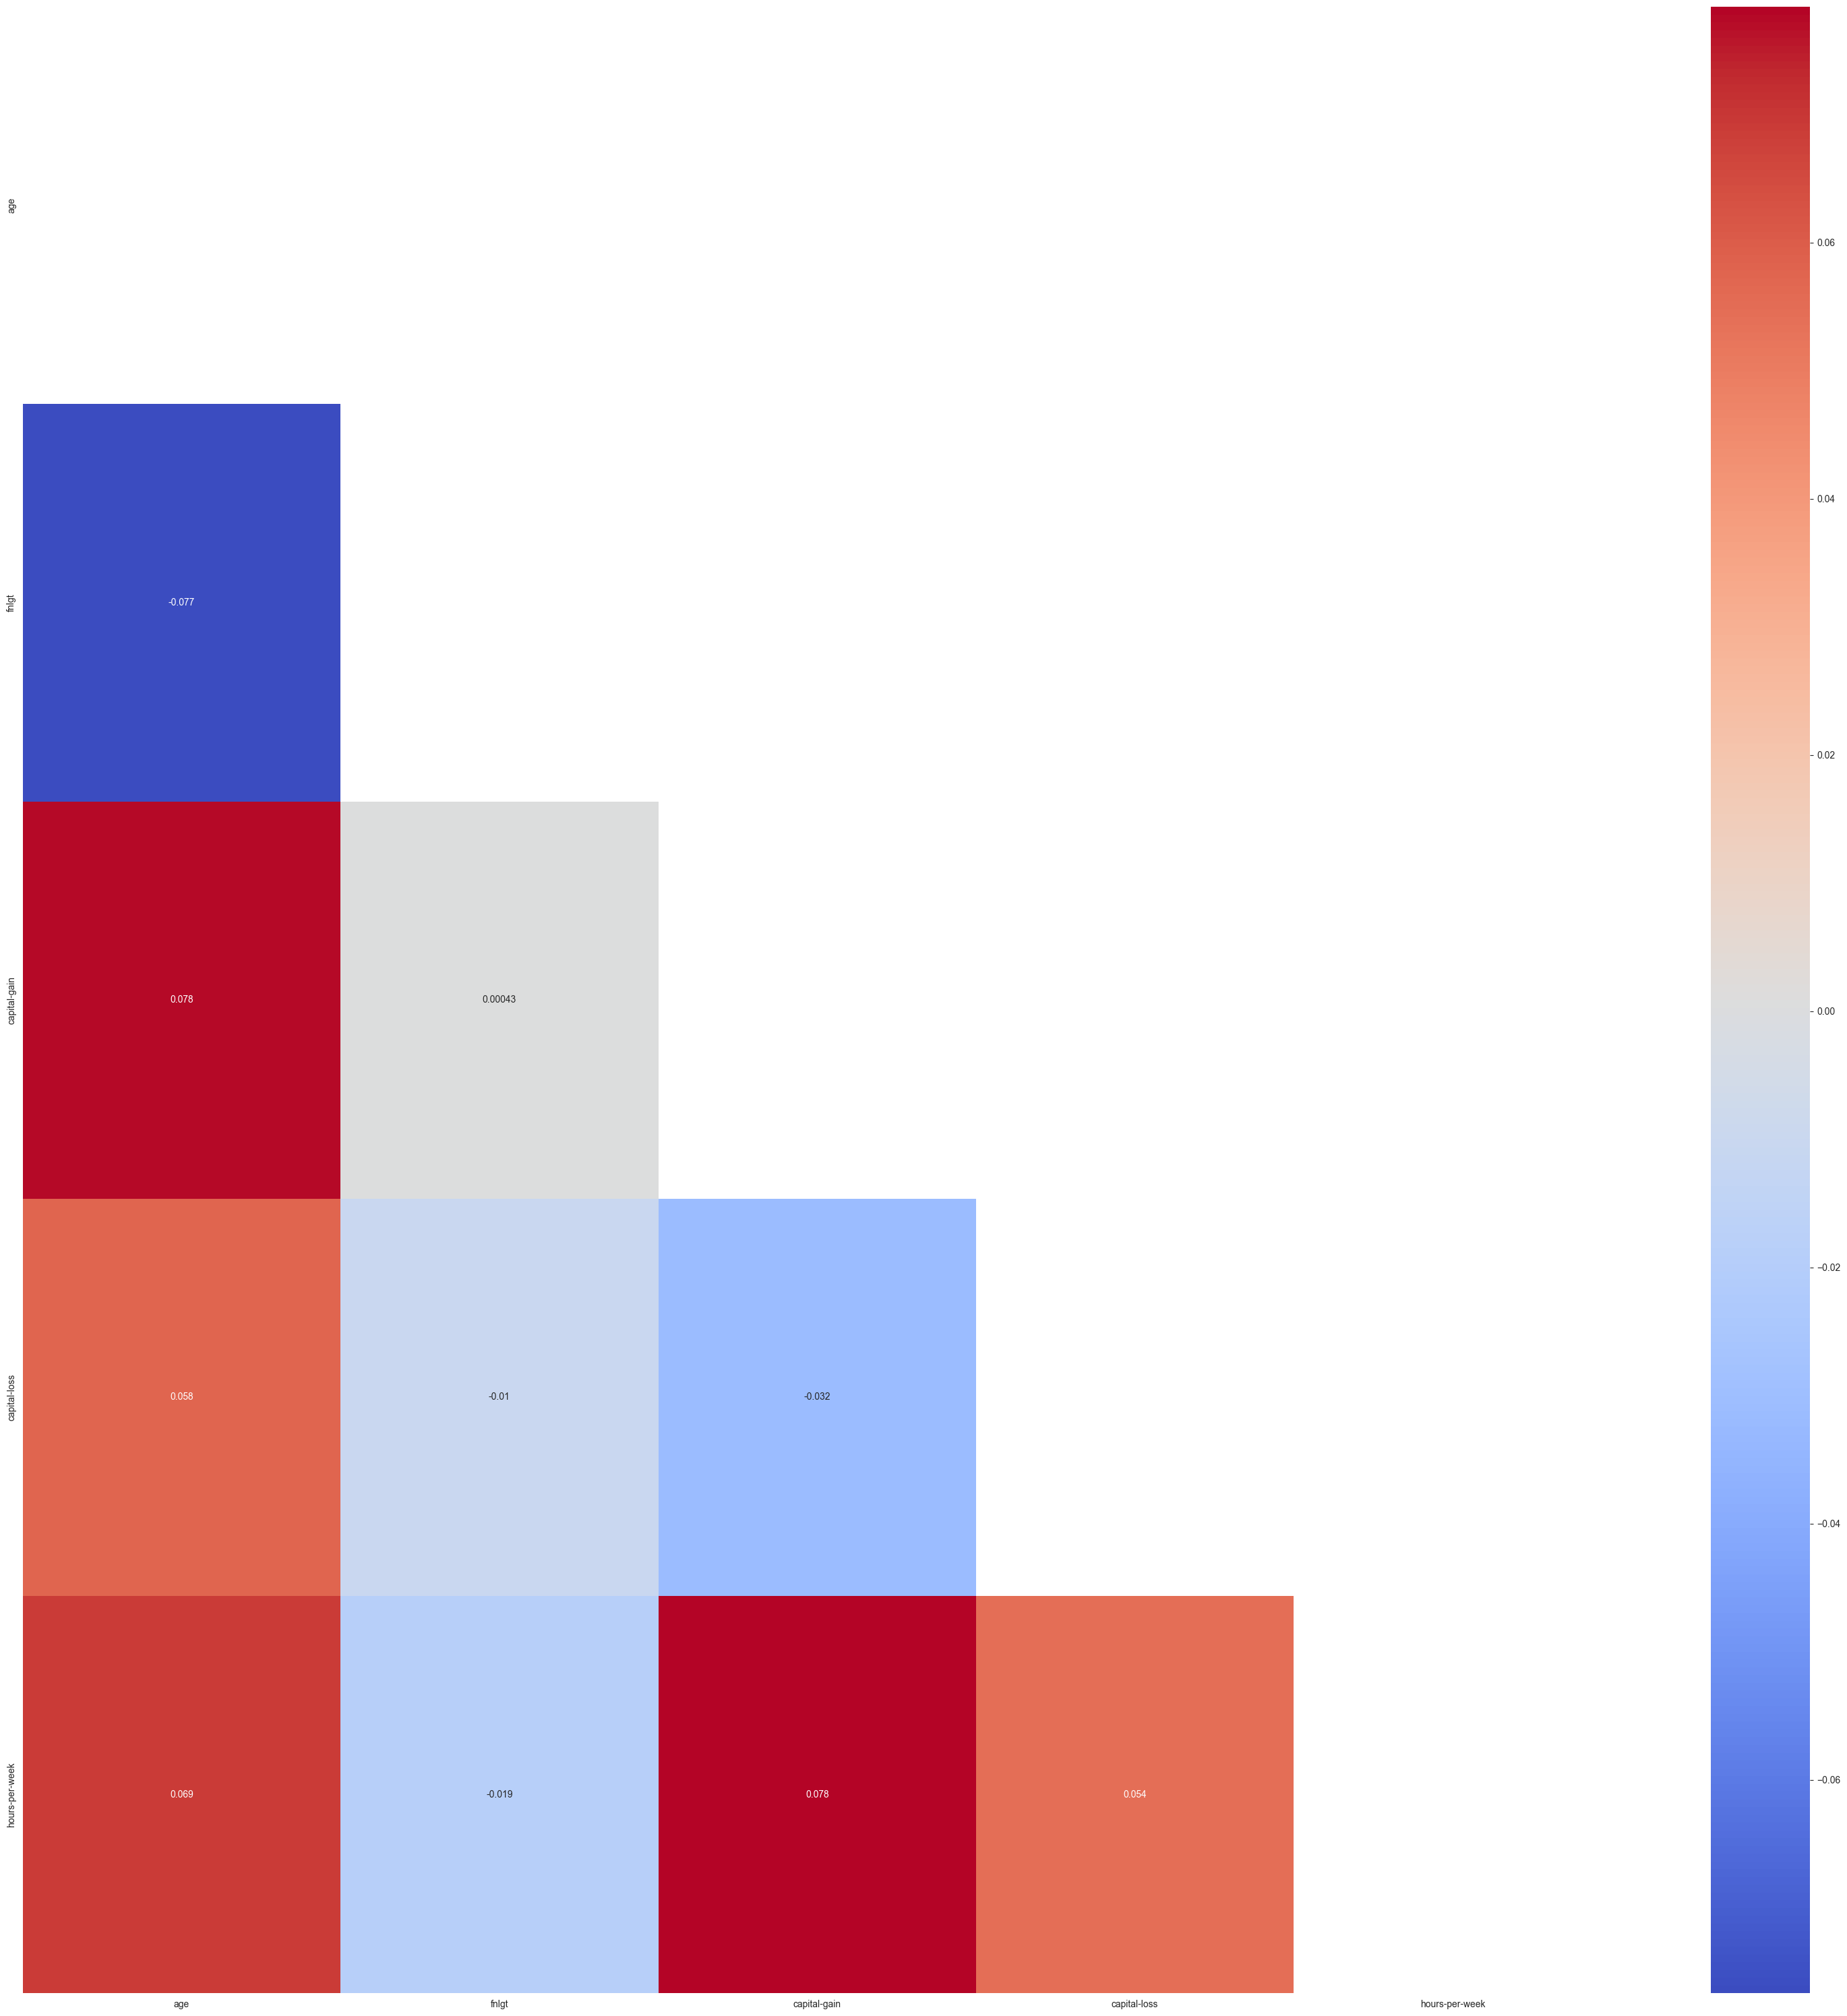

In [42]:
# checking the correlation between the numerical independent features and depedent features
sns.set_style('whitegrid')
plt.figure(figsize=(30,30))
corr = df[num_feat].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

/var/folders/f9/w24tn1853x1fk6b8gx8_qxmr0000gn/T/ipykernel_43641/2853429835.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cat.corr()


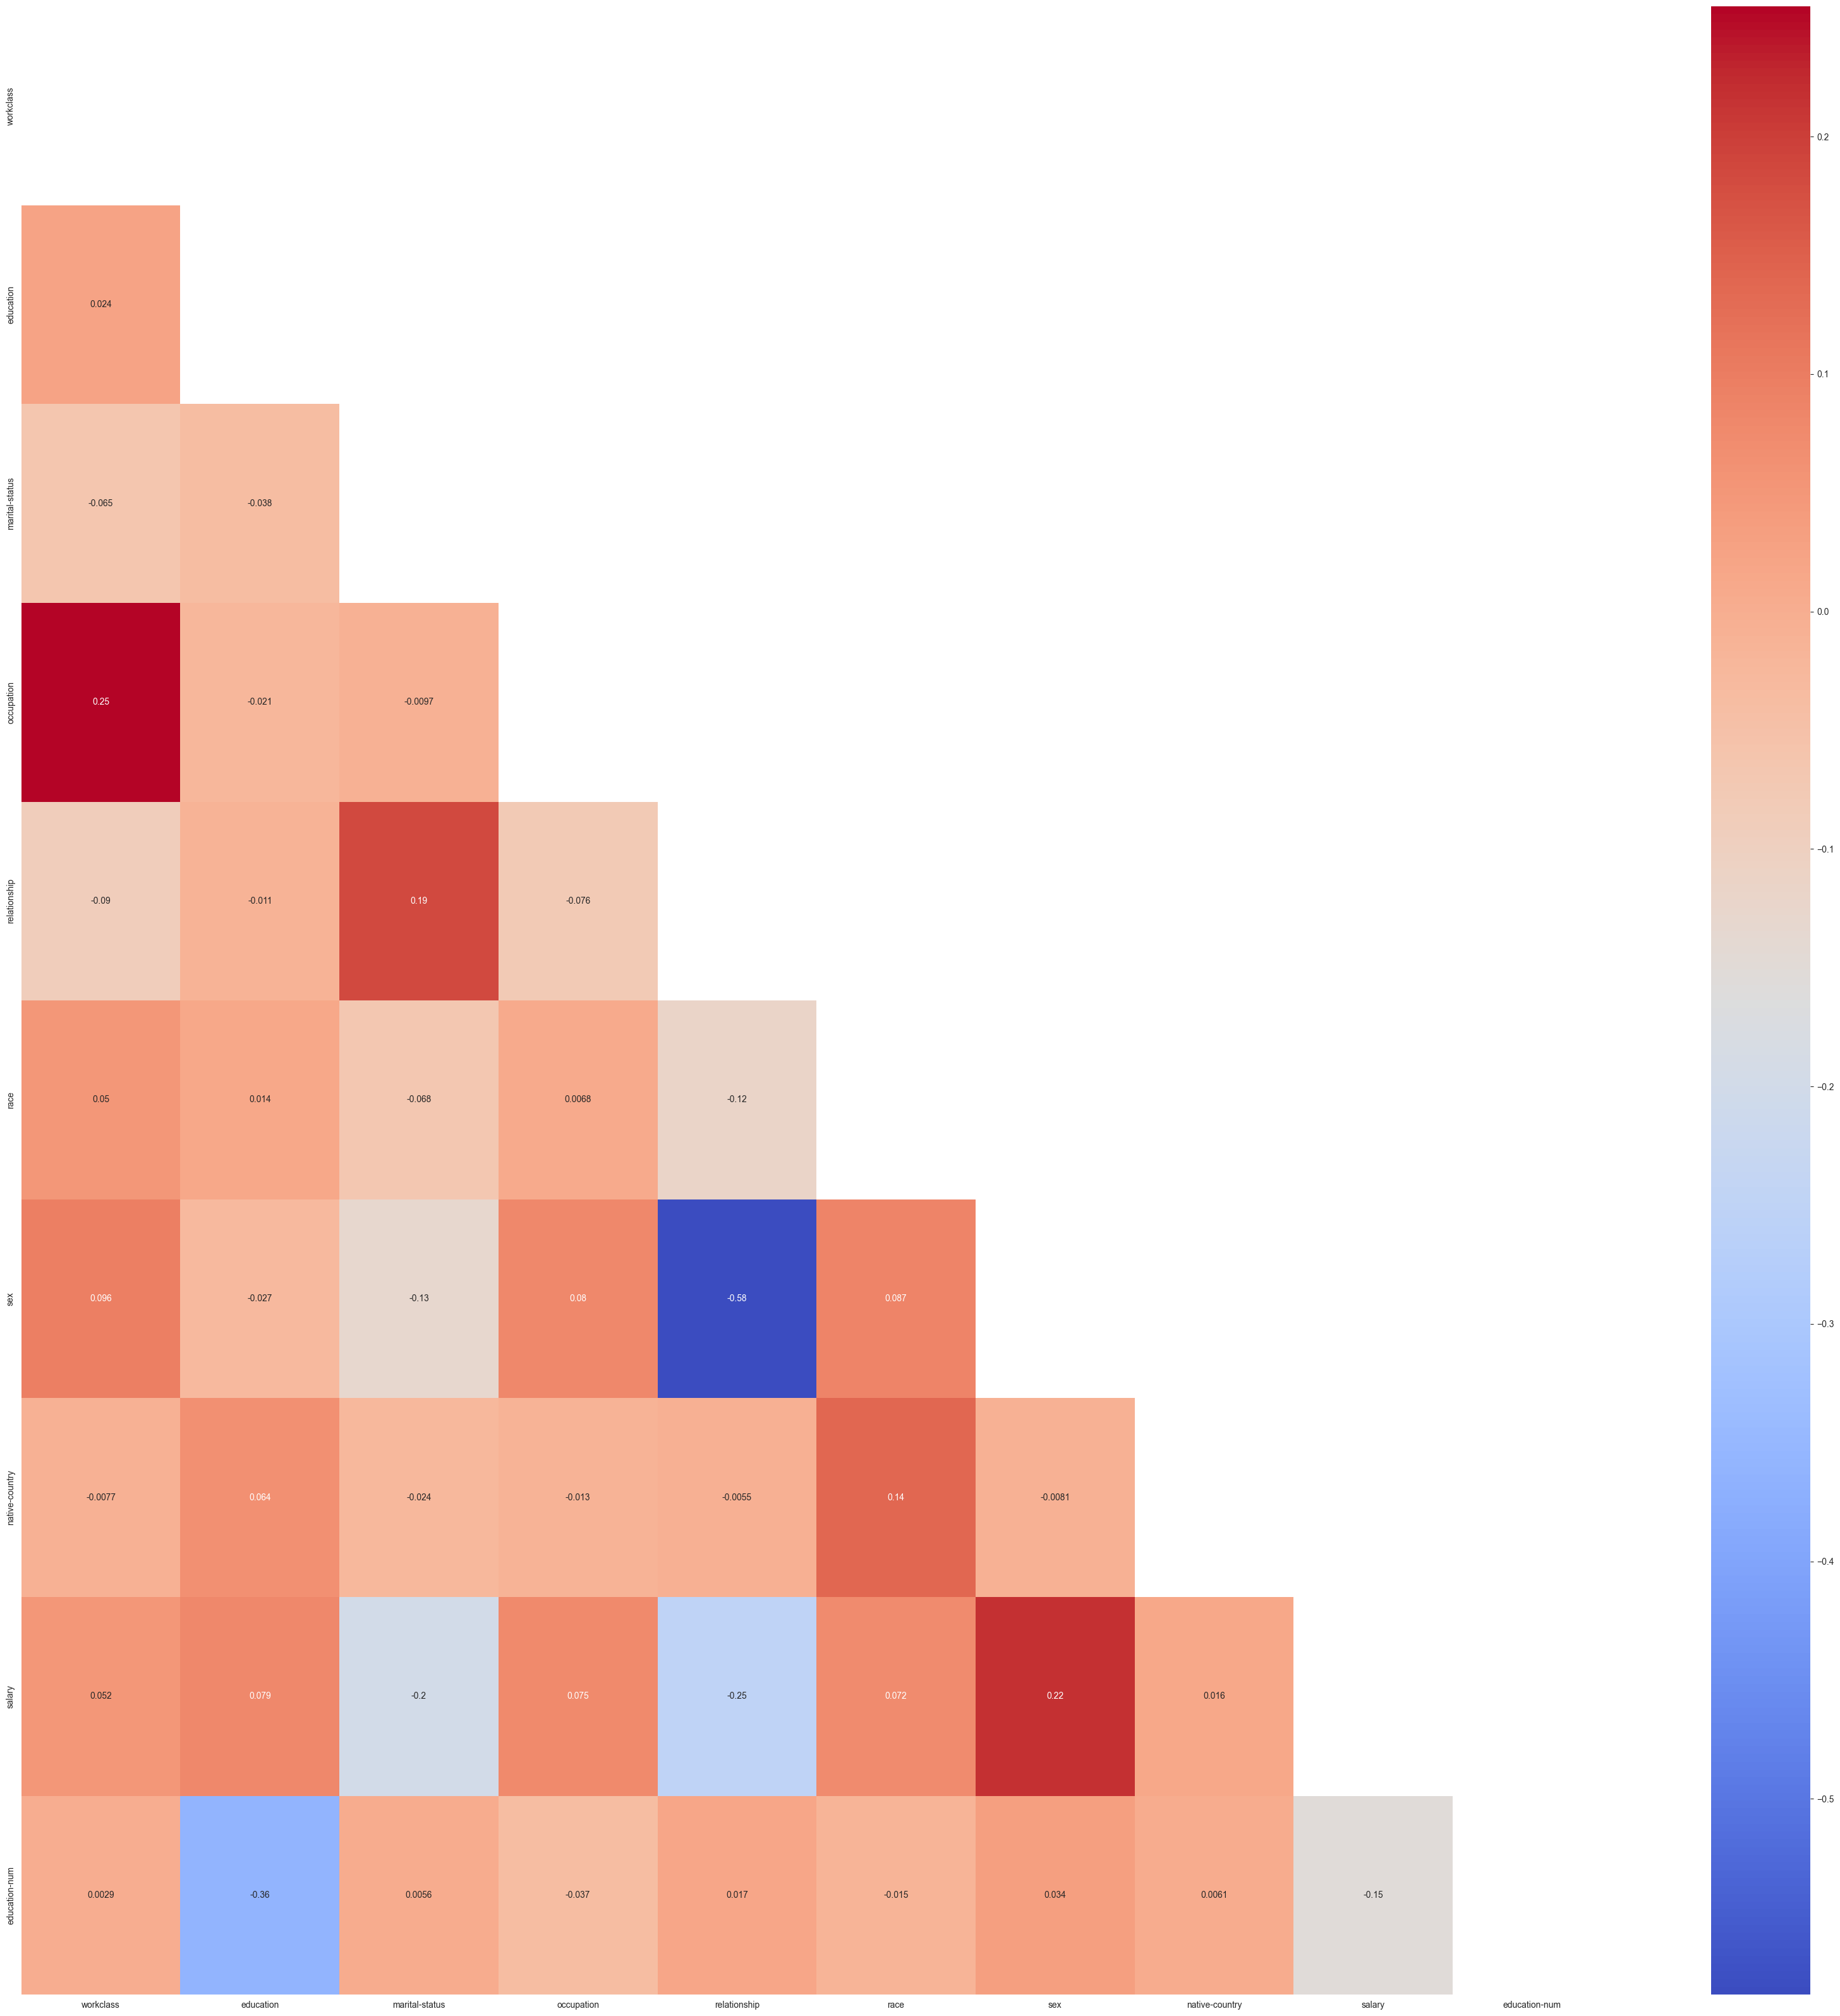

In [43]:
# checking the correlation between the categorical independent features and depedent features
sns.set_style('whitegrid')

df1 = pd.DataFrame(OrdinalEncoder().fit_transform(df[cate_feat].astype(str)), columns=cate_feat) # dataframe having categorical feature
df2 = pd.DataFrame(df['salary'], columns=['salary']) # dataframe having dependent feature
df_cat = pd.concat([df1, df2], axis=1) # dataframe having all the categorical features and one dependent feature

plt.figure(figsize=(32,32))
corr = df_cat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

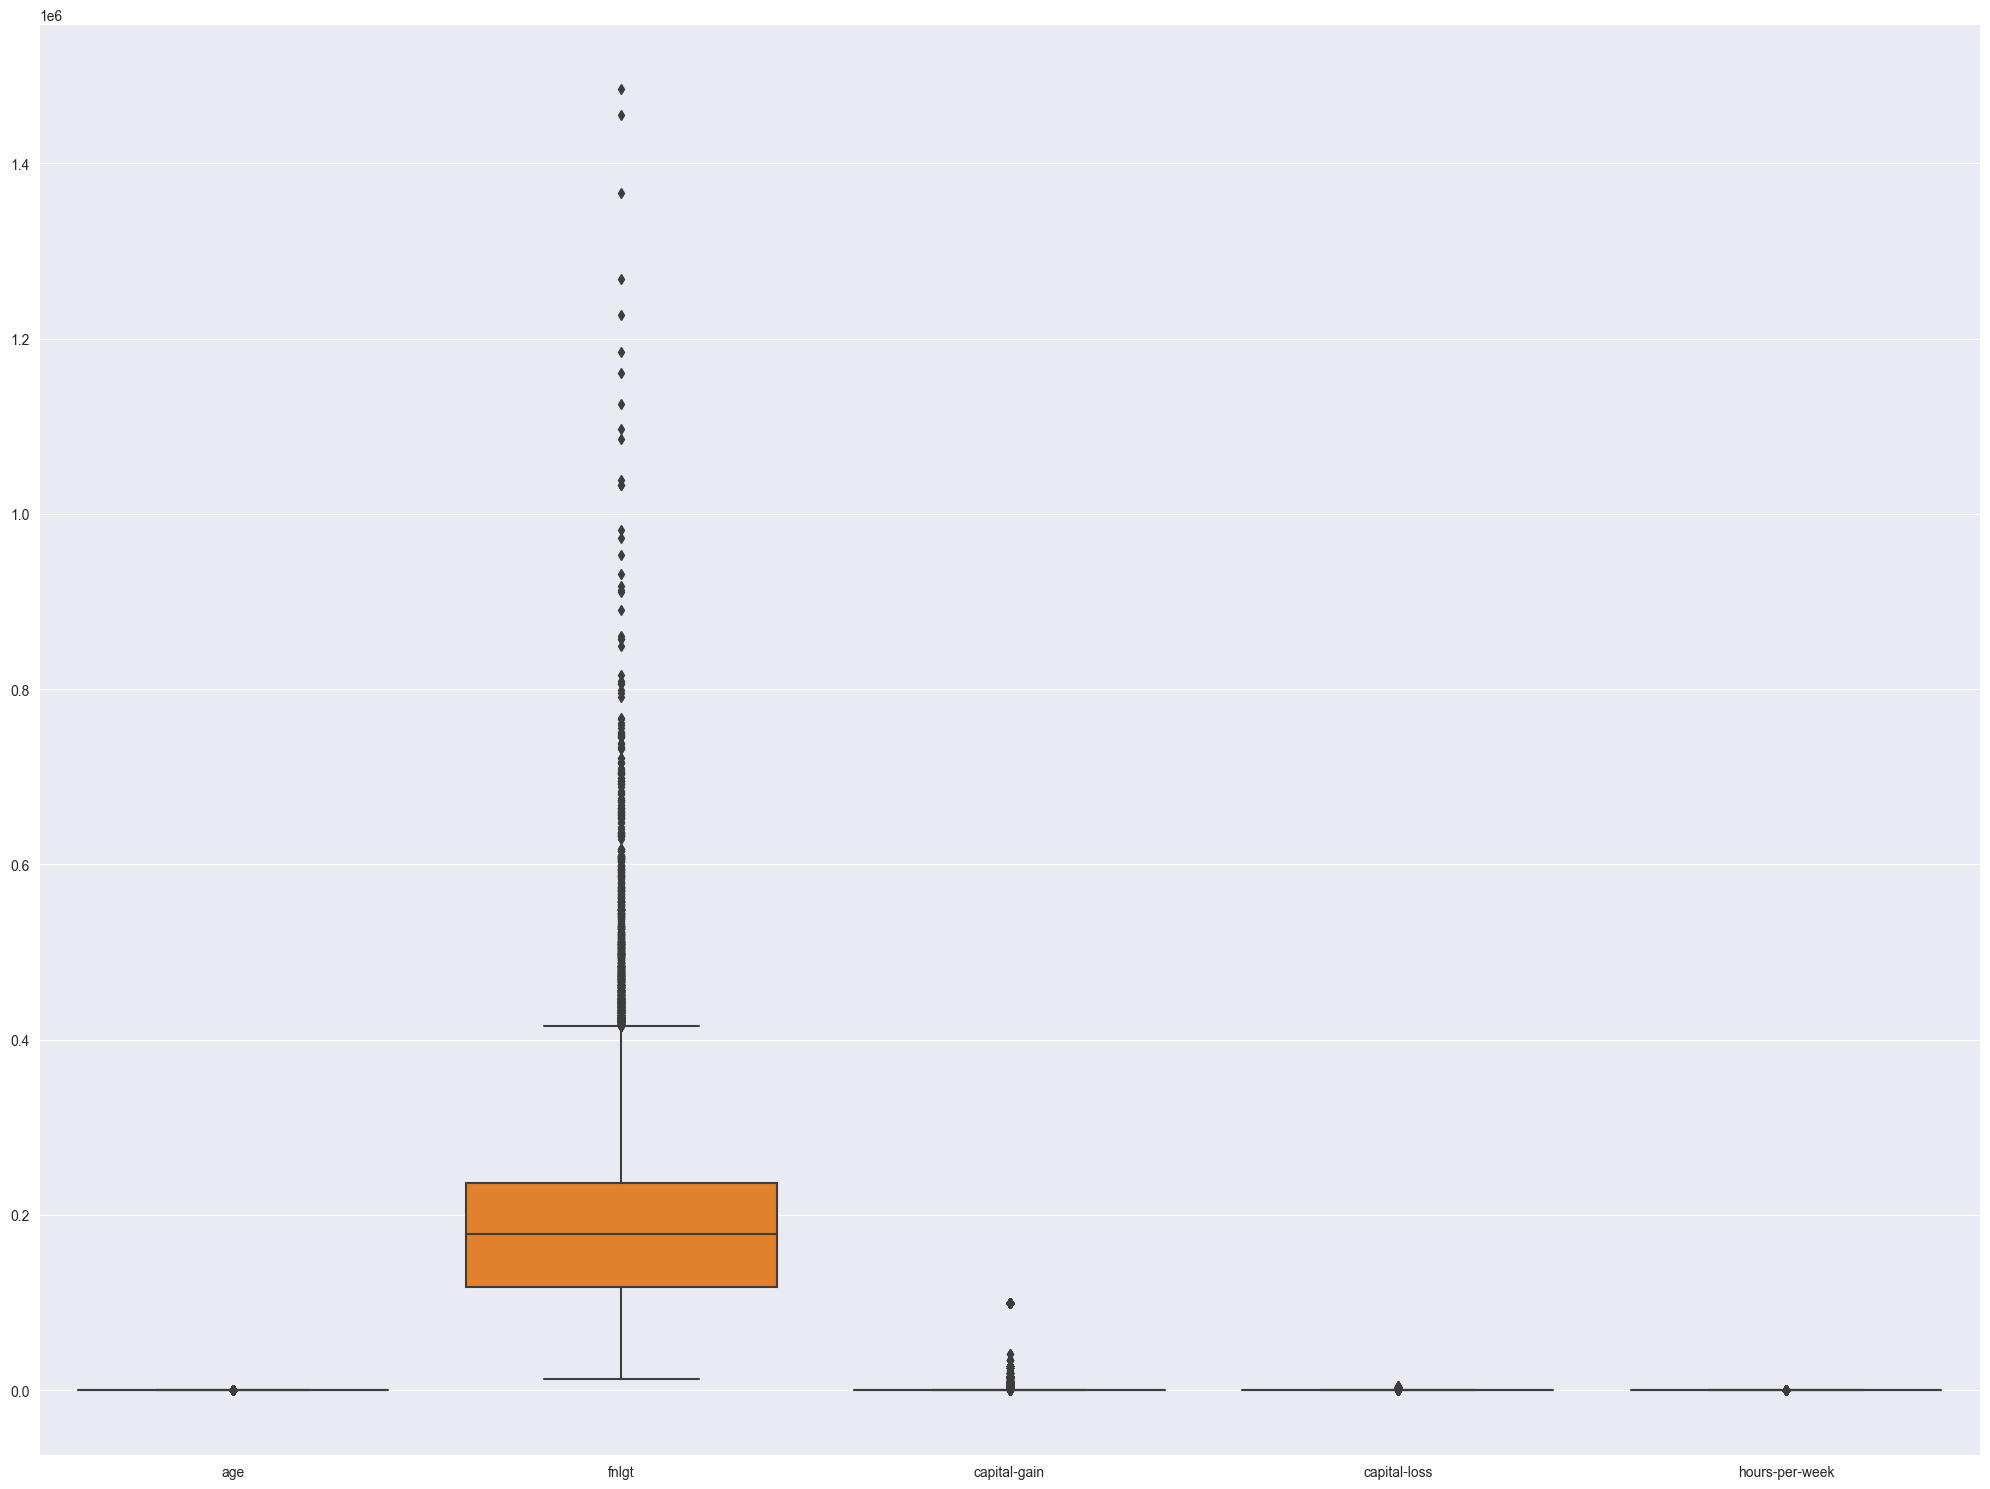

In [45]:
## finding out the outliers in the notable numerical features using box plot
plt.figure(figsize=(20,15))
sns.boxplot(data=df[num_feat], orient='v')
plt.tight_layout()

/var/folders/f9/w24tn1853x1fk6b8gx8_qxmr0000gn/T/ipykernel_43641/17847207.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=True, color='b')
/var/folders/f9/w24tn1853x1fk6b8gx8_qxmr0000gn/T/ipykernel_43641/17847207.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature]

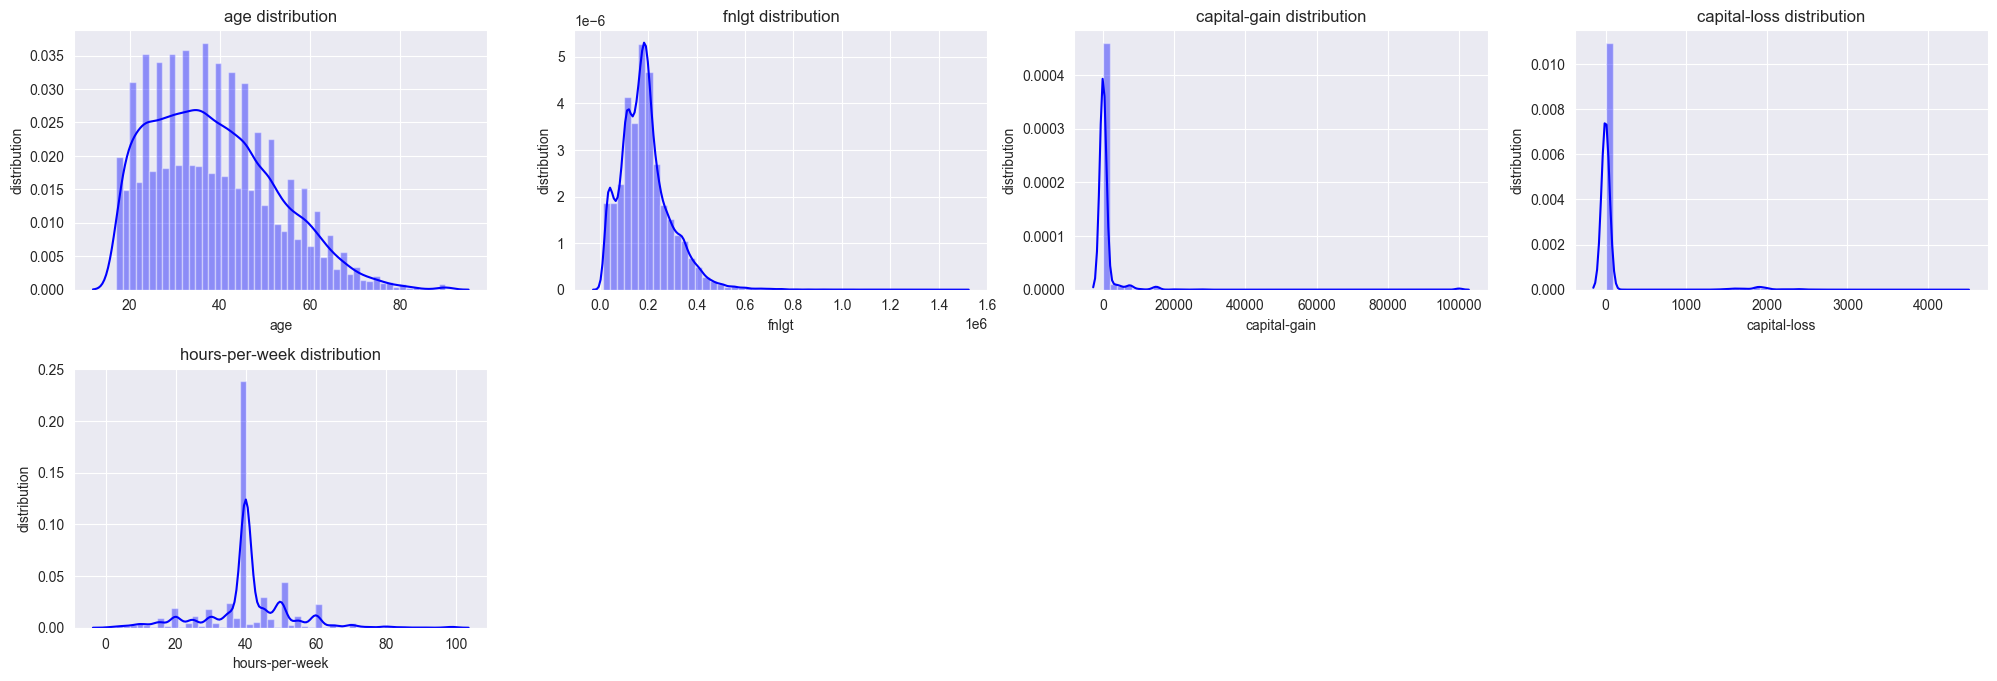

In [44]:
# checking the distribution of notable numerical features
sns.set_style('darkgrid')
plt.figure(figsize=(20,20))
for index, feature in enumerate(num_feat):
    plt.subplot(6,4,index+1)
    sns.distplot(df[feature],kde=True, color='b')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")
plt.tight_layout()

In [73]:
def transform(X):
    X['capital-gain'] = np.where(X['capital-gain']==0,np.log(X['capital-gain']+0.0003),np.log(X['capital-gain']))
    X['capital-loss'] = np.where(X['capital-loss']==0,np.log(X['capital-loss']+0.0003),np.log(X['capital-loss']))
    return X

skew_df = transform(df)

/opt/homebrew/Caskroom/miniforge/base/envs/mlops3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
